# **Installation Important Libraries**

In [1]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 6.5 MB/s 
     |████████████████████████████████| 212 kB 48.9 MB/s 
     |████████████████████████████████| 95 kB 4.6 MB/s 
     |████████████████████████████████| 115 kB 59.9 MB/s 
     |████████████████████████████████| 163 kB 46.3 MB/s 
     |████████████████████████████████| 127 kB 48.0 MB/s 
     |████████████████████████████████| 115 kB 57.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6


In [2]:
!pip install textattack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 418 kB 6.0 MB/s 
     |████████████████████████████████| 769 kB 44.9 MB/s 
     |████████████████████████████████| 41.4 MB 1.3 MB/s 
     |████████████████████████████████| 60 kB 5.3 MB/s 
     |████████████████████████████████| 3.6 MB 13.2 MB/s 
     |████████████████████████████████| 5.5 MB 25.8 MB/s 
     |████████████████████████████████| 125 kB 8.4 MB/s 
     |████████████████████████████████| 401 kB 39.5 MB/s 
     |████████████████████████████████| 365 kB 44.2 MB/s 
     |████████████████████████████████| 7.6 MB 18.8 MB/s 
     |████████████████████████████████| 46 kB 3.2 MB/s 
     |████████████████████████████████| 981 kB 40.1 MB/s 
     |████████████████████████████████| 788 kB 23.7 MB/s 
     |████████████████████████████████| 53 kB 1.0 MB/s 
     |████████████████████████████████| 19.7 MB 11.0 MB/s 
     |████████████████████████████████

In [3]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.9 MB 8.1 MB/s 
     |████████████████████████████████| 578.0 MB 13 kB/s 
     |████████████████████████████████| 1.7 MB 37.3 MB/s 
     |████████████████████████████████| 5.9 MB 18.5 MB/s 
     |████████████████████████████████| 438 kB 39.3 MB/s 
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.1
    Uninstalling importlib-metadata-3.10.1:
      Successfully uninstalled importlib-metadata-3.10.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras

In [4]:
#Required Modules
import re
import string
import numpy as np
import pandas as pd
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from matplotlib import pyplot
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import time 
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, SimpleRNN, SpatialDropout1D
from tensorflow.keras import layers
import tensorflow as tf

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


# **Load Dataset**

In [5]:
from datasets import list_datasets, load_dataset
from pprint import pprint

datasets_list = list_datasets() 

In [6]:
from datasets import load_dataset
datasets = load_dataset('snips_built_in_intents')
print(datasets)

Generating train split:   0%|          | 0/328 [00:00<?, ? examples/s]

Dataset snips_built_in_intents downloaded and prepared to /root/.cache/huggingface/datasets/snips_built_in_intents/default/0.0.0/f7f10213b60cb830d41cb190315da7151437d62acb6f21f0159f7afb4cb7c784. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 328
    })
})


# **Converting to DataFrame**

In [7]:
print(datasets['train'][0])

{'text': "Share my location with Hillary's sister", 'label': 5}


In [8]:
print(datasets['train'][0]['text'])
print(datasets['train'][0]['label'])

Share my location with Hillary's sister
5


In [9]:
print(datasets['train']['text'])

["Share my location with Hillary's sister", 'Send my current location to my father', 'Share my current location with Jim', 'Send my location to my husband', 'Send my location', 'Always share my location with Lori', 'Share my location with my boyfriend until I get home', 'Send my current location to Anna', 'Share my location with Steve for 3 days', 'Share my location to mum until I get to school', 'Share my location with my office manager until noon', 'Share my location with my Uber driver', 'Share my location with Robert for the next 10 min', 'Share my location with Jo until 8pm', 'Share my current location', "Send my current location to the friends I'm meeting with", "What's the best hotel between Soho Grand and Paramount Hotel?", "What's the cheapest between the two restaurants the closest to my hotel?", "What's the closest between Jo's and Lori's place?", "Is my Airbnb closer than John's hotel?", 'Is The View more expensive than Masa?', "What's the best between Le Bain and Marquee?"

In [10]:
dataset = pd.DataFrame(list(zip(datasets['train']['text'],datasets['train']['label'])),columns=['text','label'])
print(dataset)

                                                  text  label
0              Share my location with Hillary's sister      5
1                Send my current location to my father      5
2                   Share my current location with Jim      5
3                       Send my location to my husband      5
4                                     Send my location      5
..                                                 ...    ...
323       Will it rain tomorrow near my all day event?      2
324       I need the weather at Jo's place around 8 pm      2
325  What will the weather be like when I get out o...      2
326       Show me the forecast for my upcoming weekend      2
327                   Should I take a rain coat today?      2

[328 rows x 2 columns]


In [11]:
dataset.label.unique()

array([5, 0, 4, 3, 7, 1, 8, 9, 6, 2])

In [12]:
labels = dataset['label'].values.tolist()
sort_label = dataset['label'].unique()
sort_label.sort()
for l in sort_label:
    print(l , ": " , labels.count(l))

0 :  19
1 :  26
2 :  42
3 :  28
4 :  50
5 :  16
6 :  20
7 :  70
8 :  35
9 :  22


# **Pre-Processing**

In [13]:
#Converting to lowercase
sentences = dataset['text']
print("Before lowercase:", sentences[0])
sentences = [sentence.lower() for sentence in sentences]
print("After lowercase:", sentences[0])

Before lowercase: Share my location with Hillary's sister
After lowercase: share my location with hillary's sister


In [14]:
#Removing emoticons and punctuation
print("Before Removing Punctuation and Emoticons: ", sentences[0])
sentences = [sentence.translate(str.maketrans('', '', string.punctuation)) for sentence in sentences]
print("After Removing Punctuation and Emoticons: ", sentences[0])

Before Removing Punctuation and Emoticons:  share my location with hillary's sister
After Removing Punctuation and Emoticons:  share my location with hillarys sister


In [15]:
#Splitting into list (Removing whitespaces)
print("Before splitting:", sentences[0])
sentences = [sentence.split() for sentence in sentences]
print("After splitting:", sentences[0])

Before splitting: share my location with hillarys sister
After splitting: ['share', 'my', 'location', 'with', 'hillarys', 'sister']


In [16]:
#Lemmatization
lemmatizer = nltk.WordNetLemmatizer()
print("Before Lemmatization: ", sentences[0])
filtered_sentences = []
for words in sentences:
  filtered_words = []
  for word in words:
    filtered_words.append(lemmatizer.lemmatize(word))
  filtered_sentences.append(filtered_words)
sentences = filtered_sentences    
print("After Lemmatization: ", sentences[0])

Before Lemmatization:  ['share', 'my', 'location', 'with', 'hillarys', 'sister']
After Lemmatization:  ['share', 'my', 'location', 'with', 'hillary', 'sister']


In [17]:
sentences = [' '.join(map(str, sentence)) for sentence in sentences]

In [18]:
dataset['sentences'] = sentences
dataset = dataset.drop(['text'], axis=1)

In [19]:
dataset.head()

,label,sentences
0,5,share my location with hillary sister
1,5,send my current location to my father
2,5,share my current location with jim
3,5,send my location to my husband
4,5,send my location


# **Train Test Split**

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size = 0.10, random_state = 42)
print(len(train))
print(len(test))

295
33


In [21]:
labels = train['label'].values.tolist()
sort_label = train['label'].unique()
sort_label.sort()
for l in sort_label:
    print(l , ": " , labels.count(l))

0 :  18
1 :  24
2 :  36
3 :  24
4 :  47
5 :  14
6 :  19
7 :  62
8 :  32
9 :  19


# **Amplification of data**

## **Embedding Augmenter**

In [22]:
from textattack.augmentation import EmbeddingAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [23]:
print(train['sentences'][150])
s = train['sentences'][150]
aug = EmbeddingAugmenter()
ss = aug.augment(s)
print(ss)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.


get me a place near chelsea with good brunch cocktail tomorrow at 10


100%|██████████| 481M/481M [00:26<00:00, 18.0MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp0rksbj3b.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['get me a place near chelsea with good dinners cocktail tomorrow at 10']


In [24]:
train_aug = train.copy()
aug = EmbeddingAugmenter()
train_aug['sentences'] = train_aug['sentences'].apply(lambda x: str(aug.augment(x)))
train = train.append(train_aug, ignore_index=True)

In [25]:
train.tail()

,label,sentences
585,1,['i need a taxi for 6 to go to audrey and sam ...
586,4,['doe the butcher daughter serve vegetarian fo...
587,3,['what are the fanciest club in nouveau york']
588,6,['is there trafficking on my way to the gym']
589,3,['find me a brunch spot in reduce manhattan']


In [26]:
#Removing [] and ''
sentences = train['sentences']
print("Before Removing Punctuation and Emoticons: ", sentences[580])
sentences = [sentence.translate(str.maketrans('', '', string.punctuation)) for sentence in sentences]
print("After Removing Punctuation and Emoticons: ", sentences[580])

Before Removing Punctuation and Emoticons:  ['spectacle me the closest restaurant with all you can eat buffet']
After Removing Punctuation and Emoticons:  spectacle me the closest restaurant with all you can eat buffet


In [27]:
train = train.drop(['sentences'], axis=1)
train['sentences'] = sentences

In [28]:
len(train)

590

## **WordNet Augmenter**

In [29]:
from textattack.augmentation import WordNetAugmenter

In [30]:
train_aug = train.copy()
aug = WordNetAugmenter()
train_aug['sentences'] = train_aug['sentences'].apply(lambda x: str(aug.augment(x)))
train = train.append(train_aug, ignore_index=True)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [31]:
#Removing [] and ''
sentences = train['sentences']
print("Before Removing Punctuation and Emoticons: ", sentences[580])
sentences = [sentence.translate(str.maketrans('', '', string.punctuation)) for sentence in sentences]
print("After Removing Punctuation and Emoticons: ", sentences[580])

Before Removing Punctuation and Emoticons:  spectacle me the closest restaurant with all you can eat buffet
After Removing Punctuation and Emoticons:  spectacle me the closest restaurant with all you can eat buffet


In [32]:
train = train.drop(['sentences'], axis=1)
train['sentences'] = sentences

In [33]:
train.tail()

,label,sentences
1175,1,i need a taxi for 6 to travel to audrey and sa...
1176,4,doe the butcher daughter answer vegetarian foo...
1177,3,what are the fanciest nine in nouveau york
1178,6,is there trafficking on my path to the gym
1179,3,find me a brunch smirch in reduce manhattan


In [34]:
len(train)

1180

## **EasyData Augmenter**

In [35]:
from textattack.augmentation import EasyDataAugmenter

In [36]:
print(train['sentences'][100])

direction to my beach house avoiding toll


In [37]:
s = train['sentences'][100]
aug = EasyDataAugmenter()
ss = aug.augment(s)
print(ss)

['direction to beach house avoiding toll', 'direction beach my to house avoiding toll', 'direction to my beach house avoiding price', 'direction to my beach house avoiding toll']


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [38]:
train_aug = pd.DataFrame(columns=['sentences','label'])
aug = EasyDataAugmenter()
for index, row in train.iterrows():
    aug_sentences = aug.augment(row['sentences'])
    for s in aug_sentences:
       train_aug = train_aug.append({'sentences': s, 'label': row['label']},ignore_index=True)
train = train.append(train_aug, ignore_index=True)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [39]:
train.tail()

,label,sentences
5894,6,is my trafficking on there path to the gym
5895,3,bump me a brunch smirch in reduce manhattan
5896,3,find me a smirch brunch in reduce manhattan
5897,3,find me a brunch smirch in reduce inch manhattan
5898,3,find a brunch smirch in reduce manhattan


In [40]:
len(train)

5899

## **CheckList**

In [41]:
from textattack.augmentation import CheckListAugmenter

In [42]:
print(train['sentences'][50])
s = train['sentences'][50]
aug = CheckListAugmenter(pct_words_to_swap=0.5, transformations_per_example=2)
ss = aug.augment(s)
print(ss)

book a table for 5 people at the restaurant im used to going to every week


/usr/local/lib/python3.7/dist-packages/huggingface_hub/file_download.py:591: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  FutureWarning,


Downloading:   0%|          | 0.00/432M [00:00<?, ?B/s]

2022-11-12 08:08:28,609 loading file /root/.flair/models/ner-english/4f4cdab26f24cb98b732b389e6cebc646c36f54cfd6e0b7d3b90b25656e4262f.8baa8ae8795f4df80b28e7f7b61d788ecbb057d1dc85aacb316f1bd02837a4a4
2022-11-12 08:08:31,307 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
['book a table for 7 people at the restaurant im used to going to every week', 'book a table for 9 people at the restaurant im used to going to every week']


In [43]:
train_aug = train.copy()
aug = CheckListAugmenter(pct_words_to_swap=0.5, transformations_per_example=1)
train_aug['sentences'] = train_aug['sentences'].apply(lambda x: str(aug.augment(x)))
train = train.append(train_aug, ignore_index=True)

In [44]:
train.tail()

,label,sentences
11793,6,['is my trafficking on there path to the gym']
11794,3,['bump me a brunch smirch in reduce manhattan']
11795,3,['find me a smirch brunch in reduce manhattan']
11796,3,['find me a brunch smirch in reduce inch manha...
11797,3,['find a brunch smirch in reduce manhattan']


In [45]:
#Removing [] and ''
sentences = train['sentences']
print("Before Removing Punctuation and Emoticons: ", sentences[580])
sentences = [sentence.translate(str.maketrans('', '', string.punctuation)) for sentence in sentences]
print("After Removing Punctuation and Emoticons: ", sentences[580])

Before Removing Punctuation and Emoticons:  spectacle me the closest restaurant with all you can eat buffet
After Removing Punctuation and Emoticons:  spectacle me the closest restaurant with all you can eat buffet


In [46]:
train = train.drop(['sentences'], axis=1)
train['sentences'] = sentences

In [47]:
train.tail()

,label,sentences
11793,6,is my trafficking on there path to the gym
11794,3,bump me a brunch smirch in reduce manhattan
11795,3,find me a smirch brunch in reduce manhattan
11796,3,find me a brunch smirch in reduce inch manhattan
11797,3,find a brunch smirch in reduce manhattan


# **Tokenization**

In [48]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(dataset['sentences'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 630 unique tokens.


In [49]:
X_train = tokenizer.texts_to_sequences(train['sentences'].values)
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = tokenizer.texts_to_sequences(test['sentences'].values)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_train.shape)

Shape of data tensor: (11798, 250)


In [50]:
Y_train = pd.get_dummies(train['label']).values
Y_test = pd.get_dummies(test['label']).values
print('Shape of label tensor:', Y_train.shape)

Shape of label tensor: (11798, 10)


#**Preparing data for Model**

In [73]:
df = pd.DataFrame(list(zip(datasets['train']['text'],datasets['train']['label'])),columns=['text','label'])
print(df)

                                                  text  label
0              Share my location with Hillary's sister      5
1                Send my current location to my father      5
2                   Share my current location with Jim      5
3                       Send my location to my husband      5
4                                     Send my location      5
..                                                 ...    ...
323       Will it rain tomorrow near my all day event?      2
324       I need the weather at Jo's place around 8 pm      2
325  What will the weather be like when I get out o...      2
326       Show me the forecast for my upcoming weekend      2
327                   Should I take a rain coat today?      2

[328 rows x 2 columns]


In [74]:
df['label'].value_counts(normalize=True)

7    0.213415
4    0.152439
2    0.128049
8    0.106707
3    0.085366
1    0.079268
9    0.067073
6    0.060976
0    0.057927
5    0.048780
Name: label, dtype: float64

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(lowercase=True, #this will convert all the tokens into lower case
                         stop_words='english', #remove english stopwords from vocabulary. if we need the stopwords this value should be None
                         analyzer='word', #tokens should be words. we can also use char for character tokens
                         max_features=50000, #maximum vocabulary size to restrict too many features
                         min_df = 5,
                         max_df = .6
                        )

tfidf_vectorized_corpus = tfidf_vector.fit_transform(df.text)

In [77]:
tfidf_vectorized_corpus

<328x67 sparse matrix of type '<class 'numpy.float64'>'
	with 766 stored elements in Compressed Sparse Row format>

In [78]:
print (tfidf_vectorized_corpus.shape)

(328, 67)


# **Classification with a minimal use of ML techniques**

In [79]:
df['label'].value_counts(normalize=True)

7    0.213415
4    0.152439
2    0.128049
8    0.106707
3    0.085366
1    0.079268
9    0.067073
6    0.060976
0    0.057927
5    0.048780
Name: label, dtype: float64

The process of TF-IDF vectorization entails determining the TF-IDF score for each word in your corpus in relation to that document and then storing that data as a vector.

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(lowercase=True, #this will convert all the tokens into lower case
                         stop_words='english', #remove english stopwords from vocabulary. if we need the stopwords this value should be None
                         analyzer='word', #tokens should be words. we can also use char for character tokens
                         max_features=50000, #maximum vocabulary size to restrict too many features
                         min_df = 5,
                         max_df = .6
                        )

tfidf_vectorized_corpus = tfidf_vector.fit_transform(df.text)

In [81]:
tfidf_vectorized_corpus

<328x67 sparse matrix of type '<class 'numpy.float64'>'
	with 766 stored elements in Compressed Sparse Row format>

In [82]:
print (tfidf_vectorized_corpus.shape)

(328, 67)


#**Logistic Regression**

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [84]:
lg = LogisticRegression(multi_class='auto',solver='lbfgs')
cv_scores = cross_val_score(X=tfidf_vectorized_corpus,y=df.label,cv=5,estimator=lg)
print (cv_scores, np.mean(cv_scores),np.std(cv_scores))

[0.78787879 0.77272727 0.77272727 0.78461538 0.8       ] 0.7835897435897434 0.010244324305226597


In [85]:
cv_scores = cross_val_score(X=tfidf_vectorized_corpus,y=df.label,cv=StratifiedKFold(5,random_state=42,shuffle=True),estimator=lg)
print (cv_scores, np.mean(cv_scores),np.std(cv_scores))

[0.78787879 0.77272727 0.83333333 0.73846154 0.86153846] 0.7987878787878788 0.04374575374860547


In [86]:
from sklearn.naive_bayes import MultinomialNB

In [87]:
nb = MultinomialNB()
cv_scores = cross_val_score(X=tfidf_vectorized_corpus,y=df.label,cv=5,estimator=nb)
print (cv_scores, np.mean(cv_scores),np.std(cv_scores))

[0.74242424 0.66666667 0.65151515 0.66153846 0.69230769] 0.6828904428904428 0.03266951118402685


In [88]:
cv_scores = cross_val_score(X=tfidf_vectorized_corpus,y=df.label,cv=StratifiedKFold(5,random_state=42,shuffle=True),estimator=nb)
print (cv_scores, np.mean(cv_scores),np.std(cv_scores))

[0.66666667 0.66666667 0.66666667 0.64615385 0.78461538] 0.6861538461538461 0.04986767499956192


In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
model = RandomForestClassifier(n_estimators=101, random_state=42) #n_estimator is the parameter to control number of decision tress
cv_scores = cross_val_score(X=tfidf_vectorized_corpus,y=df.label,cv=5,estimator=model)
print (cv_scores, np.mean(cv_scores),np.std(cv_scores))

[0.77272727 0.72727273 0.78787879 0.78461538 0.81538462] 0.7775757575757576 0.028771934846604275


In [91]:
cv_scores = cross_val_score(X=tfidf_vectorized_corpus,y=df.label,cv=StratifiedKFold(5,random_state=42,shuffle=True),estimator=model)
print (cv_scores, np.mean(cv_scores),np.std(cv_scores))

[0.75757576 0.78787879 0.81818182 0.76923077 0.78461538] 0.7834965034965035 0.020488648610453165


In [92]:
for train_idx, val_idx in StratifiedKFold(n_splits=5,random_state=42,shuffle=True).split(tfidf_vectorized_corpus,df.label.values):
    break

In [93]:
trainX = tfidf_vectorized_corpus[train_idx]
valX = tfidf_vectorized_corpus[val_idx]
trainy = df.label.values[train_idx]
valy = df.label.values[val_idx]

print (trainX.shape, valX.shape)

(262, 67) (66, 67)


In [94]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [95]:
lg = LogisticRegression(multi_class='auto',solver='lbfgs')
lg.fit(trainX,trainy)

val_train= lg.predict(trainX)
val_pred = lg.predict(valX)

In [96]:
print ("Accuracy score: {}".format(accuracy_score(trainy,val_train)))
print ("F1 score: {}".format(f1_score(trainy,val_train,average='macro')))

Accuracy score: 0.8816793893129771
F1 score: 0.8681528649951662


In [97]:
print ("Accuracy score: {}".format(accuracy_score(valy,val_pred)))
print ("F1 score: {}".format(f1_score(valy,val_pred,average='macro')))

Accuracy score: 0.7878787878787878
F1 score: 0.7977558839627805


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
def plot_cm(y_true, y_pred, labels, title):
    figsize=(14,10)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(labels))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap='viridis', annot=annot, fmt='', ax=ax)

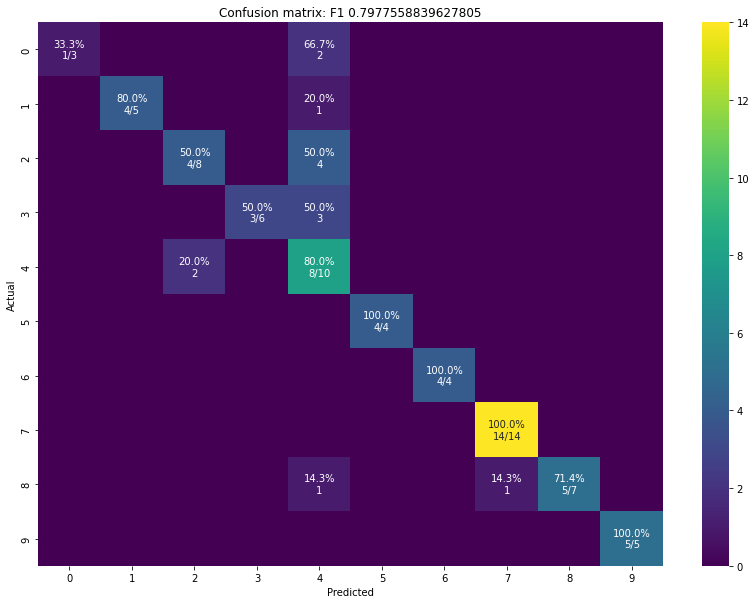

In [100]:
#print (confusion_matrix(valy, val_pred,labels=model.classes_))
labels = lg.classes_
plot_cm(valy,val_pred,labels,'Confusion matrix: F1 {}'.format(f1_score(valy,val_pred,average='macro')))

# Analyses of the Model

In [107]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
import eli5

In [103]:
eli5.show_weights(lg, vec=tfidf_vector, top=25)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [104]:
df.iloc[val_idx[:3]]['text']

0    Share my location with Hillary's sister
1      Send my current location to my father
8    Share my location with Steve for 3 days
Name: text, dtype: object

In [105]:
df.text.values[val_idx[9]]

"What's the price range for a dinner at Galli?"

In [106]:
eli5.show_prediction(lg, doc=df.text.values[val_idx[9]], vec=tfidf_vector, top=10)